# **IMPORTING LIBRARIES**

In [71]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import gc
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,mean_squared_error,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier,VotingClassifier,AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import precision_recall_curve,roc_auc_score,classification_report,roc_curve
from tqdm import tqdm

# **IMPORTING DATASET**

In [72]:
test = pd.read_csv('/content/drive/MyDrive/LGM RAW DATA/test.csv')
songs = pd.read_csv('/content/drive/MyDrive/LGM RAW DATA/song_extra_info.csv')
members = pd.read_csv('/content/drive/MyDrive/LGM RAW DATA/members.csv')
sample = pd.read_csv('/content/drive/MyDrive/LGM RAW DATA/sample_submission.csv')
train = pd.read_csv('/content/drive/MyDrive/LGM RAW DATA/train.csv')

In [73]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [74]:
songs.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [75]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [76]:
sample.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [77]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


# **CHECKING SHAPES**

In [78]:
test.shape

(2556790, 6)

In [79]:
songs.shape

(2295971, 3)

In [80]:
members.shape

(34403, 7)

In [81]:
sample.shape

(2556790, 2)

In [82]:
train.shape

(7377418, 6)

# **CHECKING INFO**

In [83]:
test.info

<bound method DataFrame.info of               id                                          msno  \
0              0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1              1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
2              2  /uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=   
3              3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4              4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
...          ...                                           ...   
2556785  2556785  XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=   
2556786  2556786  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   
2556787  2556787  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   
2556788  2556788  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   
2556789  2556789  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   

                                              song_id source_system_tab  \
0        WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1        y/rsZ9DC7FwK5F2P

In [84]:
songs.info

<bound method DataFrame.info of                                               song_id  \
0        LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=   
1        ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=   
2        u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=   
3        92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=   
4        0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=   
...                                               ...   
2295966  hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=   
2295967  N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=   
2295968  pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=   
2295969  QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=   
2295970  DYKJKSgDOKxb19XzOVO81176qTH0OIHCsfzFRm/BG+g=   

                              name          isrc  
0                               我們  TWUM71200043  
1                  Let Me Love You  QMZSY1600015  
2                              原諒我  TWA530887303  
3                          Classic  USSM11301446  
4                           

In [85]:
members.info

<bound method DataFrame.info of                                                msno  city  bd gender  \
0      XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1      UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2      D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3      mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4      q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   
...                                             ...   ...  ..    ...   
34398  Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=     1   0    NaN   
34399  g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=     4  18   male   
34400  IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=     1   0    NaN   
34401  WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=     1   0    NaN   
34402  xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=     1   0    NaN   

       registered_via  registration_init_time  expiration_date  
0                   7                2

In [86]:
sample.info

<bound method DataFrame.info of               id  target
0              0     0.5
1              1     0.5
2              2     0.5
3              3     0.5
4              4     0.5
...          ...     ...
2556785  2556785     0.5
2556786  2556786     0.5
2556787  2556787     0.5
2556788  2556788     0.5
2556789  2556789     0.5

[2556790 rows x 2 columns]>

In [87]:
train.info

<bound method DataFrame.info of                                                  msno  \
0        FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4        FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
...                                               ...   
7377413  6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=   
7377414  ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=   
7377415  ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=   
7377416  0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=   
7377417  0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=   

                                              song_id source_system_tab  \
0        BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1        bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2        JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=     

# **CHECKING DESCRIBE**

In [88]:
test.describe

<bound method NDFrame.describe of               id                                          msno  \
0              0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1              1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
2              2  /uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=   
3              3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4              4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
...          ...                                           ...   
2556785  2556785  XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=   
2556786  2556786  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   
2556787  2556787  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   
2556788  2556788  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   
2556789  2556789  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   

                                              song_id source_system_tab  \
0        WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1        y/rsZ9DC7FwK5F

In [89]:
songs.describe

<bound method NDFrame.describe of                                               song_id  \
0        LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=   
1        ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=   
2        u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=   
3        92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=   
4        0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=   
...                                               ...   
2295966  hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=   
2295967  N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=   
2295968  pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=   
2295969  QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=   
2295970  DYKJKSgDOKxb19XzOVO81176qTH0OIHCsfzFRm/BG+g=   

                              name          isrc  
0                               我們  TWUM71200043  
1                  Let Me Love You  QMZSY1600015  
2                              原諒我  TWA530887303  
3                          Classic  USSM11301446  
4                         

In [90]:
members.describe

<bound method NDFrame.describe of                                                msno  city  bd gender  \
0      XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1      UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2      D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3      mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4      q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   
...                                             ...   ...  ..    ...   
34398  Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=     1   0    NaN   
34399  g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=     4  18   male   
34400  IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=     1   0    NaN   
34401  WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=     1   0    NaN   
34402  xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=     1   0    NaN   

       registered_via  registration_init_time  expiration_date  
0                   7               

In [91]:
sample.describe

<bound method NDFrame.describe of               id  target
0              0     0.5
1              1     0.5
2              2     0.5
3              3     0.5
4              4     0.5
...          ...     ...
2556785  2556785     0.5
2556786  2556786     0.5
2556787  2556787     0.5
2556788  2556788     0.5
2556789  2556789     0.5

[2556790 rows x 2 columns]>

In [92]:
train.describe

<bound method NDFrame.describe of                                                  msno  \
0        FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4        FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
...                                               ...   
7377413  6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=   
7377414  ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=   
7377415  ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=   
7377416  0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=   
7377417  0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=   

                                              song_id source_system_tab  \
0        BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1        bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2        JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=   

# **VISUALISING DATA**

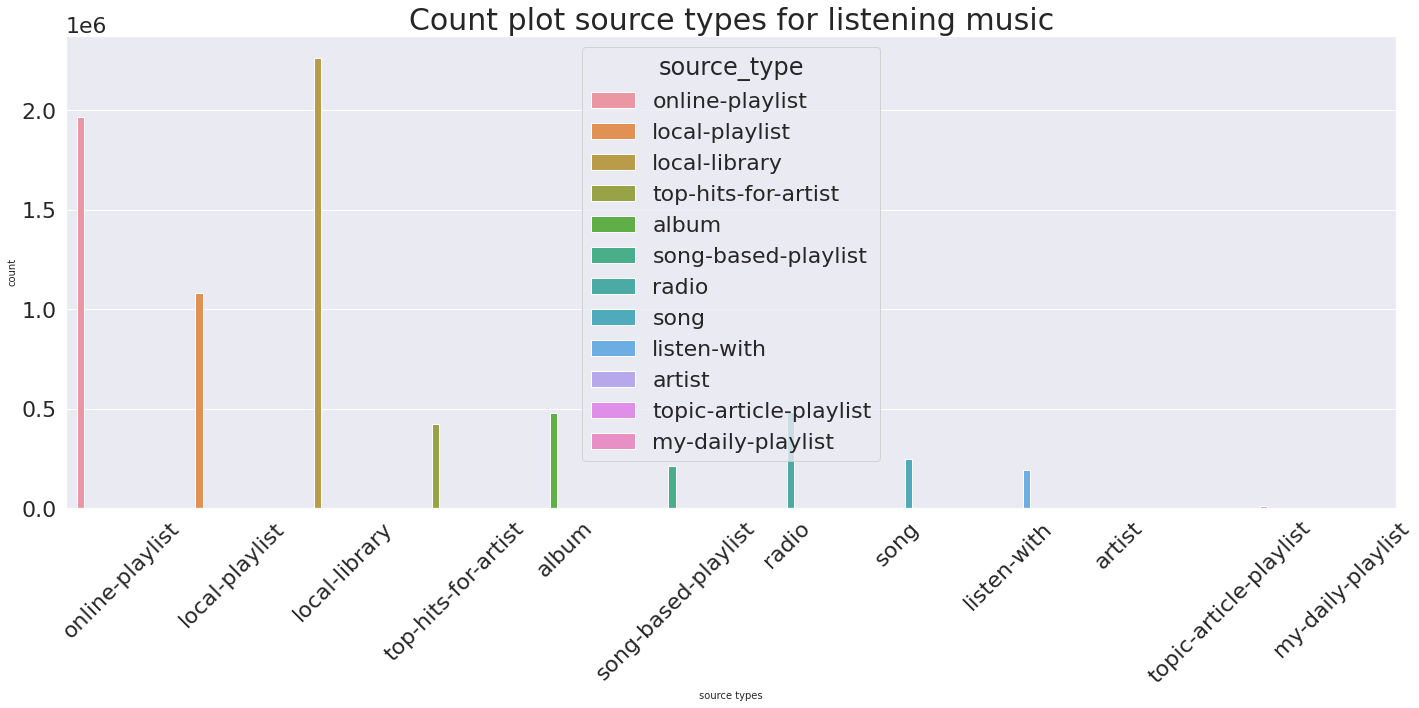

In [93]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=30)
plt.tight_layout()

# **INFERENCES**
1.  First visualization we can see as if local library are more perffered than any other source types as well after that online playlist and local playlist and other features are showing less importance but can't say anything right now as we handn't deal with cleaning , imputing , stats.
2.  But as far we are sure are answers for buliding this systems in revolving maximum issues around local library see next what other result say

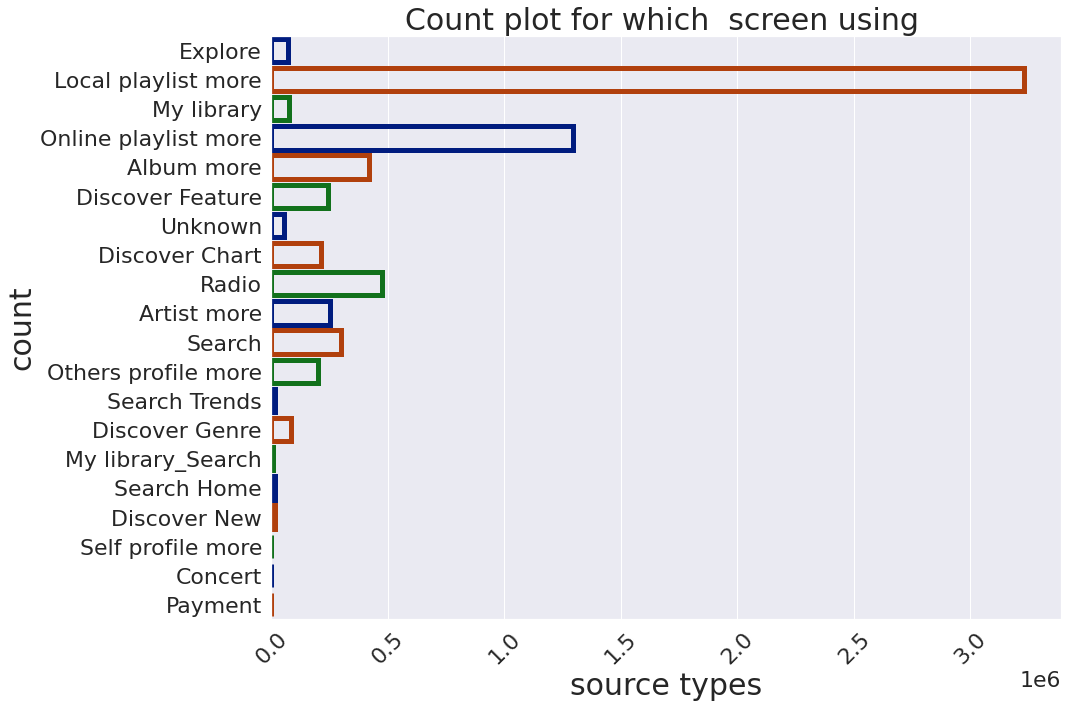

In [94]:
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for which  screen using ',fontsize=30)
plt.tight_layout()

# **INFERENCES**
1.  Second Visualization is telling us that most of the users are listenning local
playlist more means the app which is provided by the company they are using them apart from this we can also see that after this most the users are coming back to the songs by online playlist sources.
2.  Very less from the other different sources means are outliers , variance and std deviations are in 2 areas local libs and online playlist

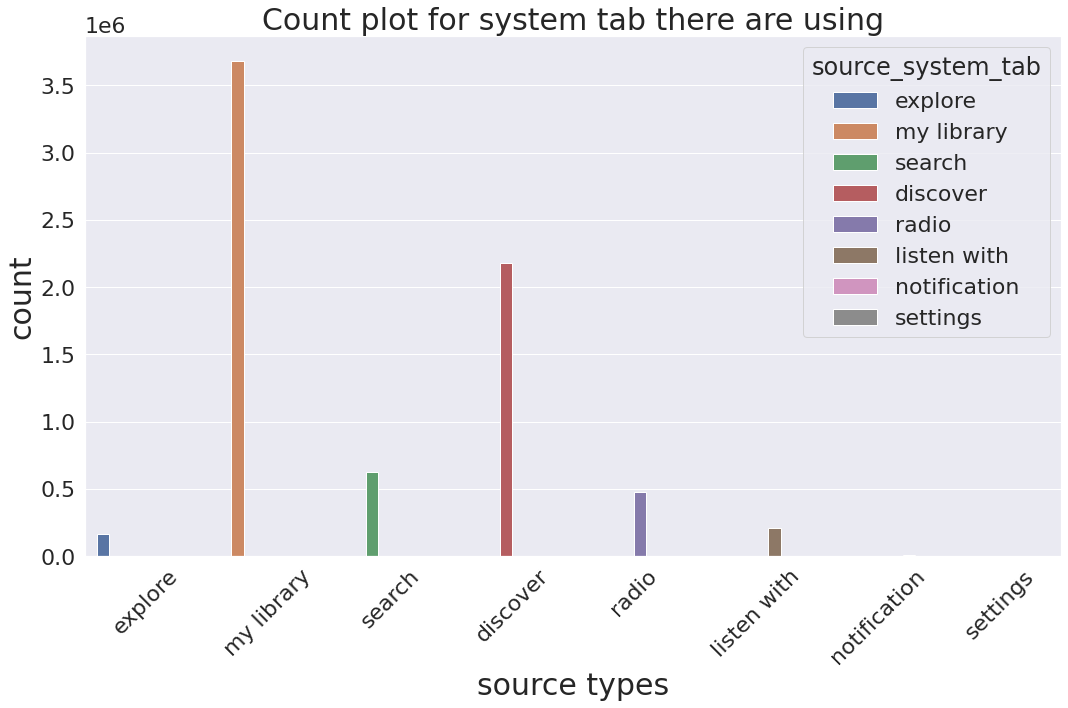

In [95]:
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.countplot(x='source_system_tab',hue='source_system_tab',data=train)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using',fontsize=30)
plt.tight_layout()

# **INFERENCES**
So anyone who has installed music app we can see most of the users are going back to there songs via my library rather discovering them means there are different sources they can go back but most preffered one is my library
now doing some visualiaztion in members.csv

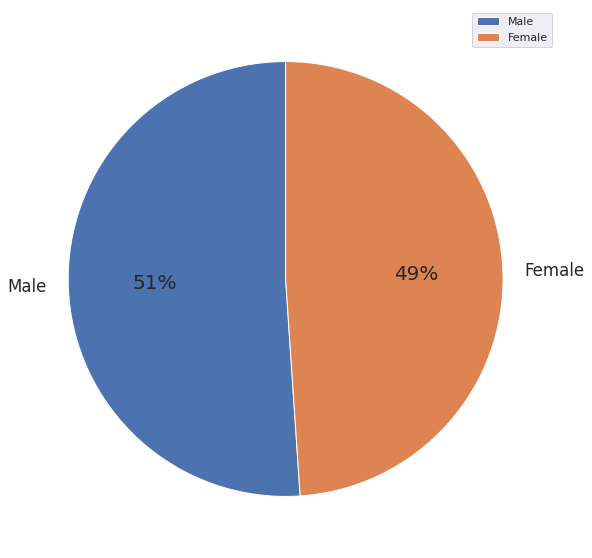

In [96]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 20.0
labels = ['Male','Female']
plt.figure(figsize = (10,10))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes,labels=labels, autopct='%.0f%%',shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

# **INFERENCES**
As we can see we have male users more now visualization has to be done in this manner like from how many types genders which are popular ways to go back in there playlist

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64


<Figure size 1080x720 with 0 Axes>

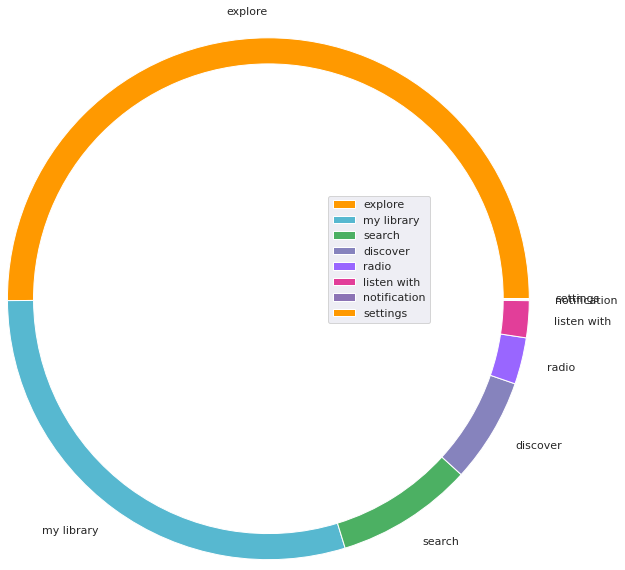

In [97]:
import matplotlib.pyplot as plt
mpl.rcParams['font.size'] = 40.0
plt.figure(figsize = (15,10)) 
group_names=['explore','my library','search','discover','radio','listen with','notification','settings']
group_size=pd.value_counts(train.source_system_tab)
print(group_size)
subgroup_names=['Male','Female']
subgroup_size=pd.value_counts(members.gender)
a, b, c,d,e,f,g,h=[plt.cm.autumn, plt.cm.GnBu, plt.cm.YlGn,plt.cm.Purples,plt.cm.cool,plt.cm.RdPu,plt.cm.BuPu,plt.cm.bone]
fig, ax = plt.subplots()
ax.axis('equal')
mypie, texts= ax.pie(group_size, radius=3.0,labels=group_names, colors=[a(0.6), b(0.6), c(0.6),d(0.6), e(0.6), f(0.6),g(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
plt.legend() 
plt.show()

# **INFERENCES**
1.  We can draw from this chart that among Men exploration method is only way they are using while females are using every possible way to get back their music of choices , in real world this thing also very much similar that men focuses in one direction in depth whereas women focuses in every possible direction but not in depth
2.  We are moving in right direction of building a good accurate systems now some statistics inferences
as we have numeric data in tow csv files and rest of the files with categorical data so members.csv file with 2 columns in numeric and song.csv

# **DOING STATS TEST ON MEMBERS.CSV**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'registration time ')

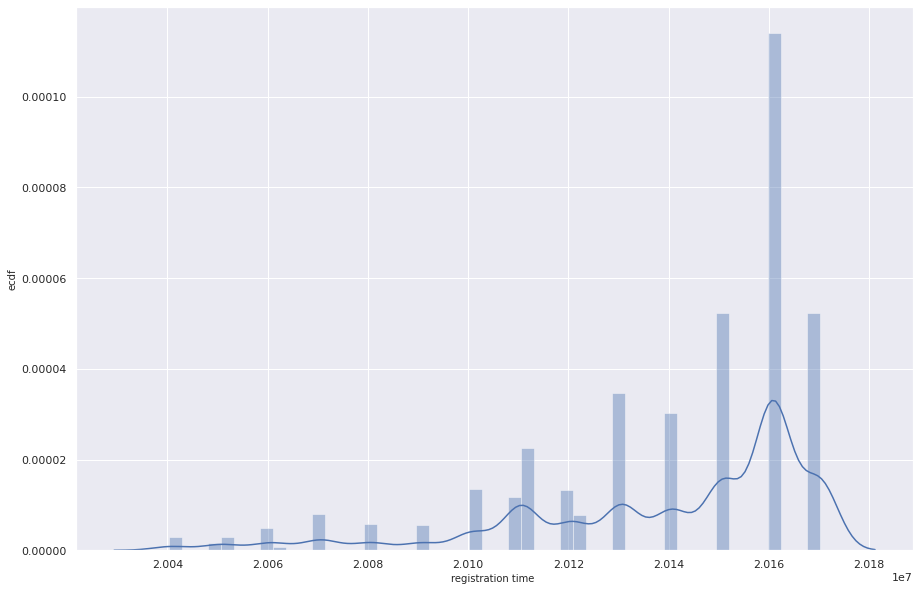

In [98]:
mpl.rcParams['font.size'] = 20.0
plt.figure(figsize = (15, 10)) 
sns.distplot(members.registration_init_time)
sns.set(font_scale=2)
plt.ylabel('ecdf',fontsize=10)
plt.xlabel('registration time ' ,fontsize=10)

# **INFERENCES**
We can drawn from above two result that maximum registration were done in time period of 2012 to 2016 and most this righthand skewed graph one more thing before applying we have to normalize it

# **MERGING DATASETS FOR INTERESTING INSIGHTS**

In [99]:
train_members = pd.merge(train, members, on='msno', how='inner')
train_merged = pd.merge(train_members, songs, on='song_id', how='outer')
print(train_merged.head())

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=   
2  xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=   
3  s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=   
4  Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=          discover   
2  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   
3  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   
4  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   

     source_screen_name      source_type  target  city    bd  gender  \
0               Explore  online-playlist     1.0   1.0   0.0     NaN   
1  Online playlist more  online-playlist     0.0  15.0  18.0    male   
2   Local playlist more    local-library     1.0   1.0   0.0  

In [100]:
test_members = pd.merge(test, members, on='msno', how='inner')
test_merged = pd.merge(test_members, songs, on='song_id', how='outer')
print(test_merged.head())
print(len(test_merged.columns))

          id                                          msno  \
0        0.0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1  1035059.0  08rvvaaab7dM7h78GC4SphLkUCSXPxpu6sY+k8aLUO4=   
2    89968.0  1NvrMNDUcvfqOIjhim8BgdK23znMzGwAO84W+qKs6dw=   
3   972394.0  GfSXhTVP3oj7h0545L/5xh6jD+7edQ7AH0iprl7dYbc=   
4  2194574.0  HkWEvfQyrb5Lve8X3B7HkCEkDFW8qFy/9kWFb4QbM5k=   

                                        song_id source_system_tab  \
0  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
2  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
3  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
4  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=          discover   

    source_screen_name          source_type  city    bd  gender  \
0  Local playlist more        local-library   1.0   0.0     NaN   
1  Local playlist more        local-library   5.0  29.0  female   
2  Local pl

In [101]:
del train_members
del test_members

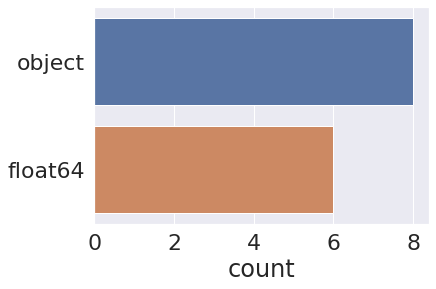

In [102]:
ax = sns.countplot(y=train_merged.dtypes, data=train_merged)

In [103]:

print(train_merged.columns.to_series().groupby(train_merged.dtypes).groups)
print(test_merged.columns.to_series().groupby(test_merged.dtypes).groups)

{float64: ['target', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date'], object: ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'name', 'isrc']}
{float64: ['id', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date'], object: ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'name', 'isrc']}


# **ANALYSING ON MISSING VALUES**

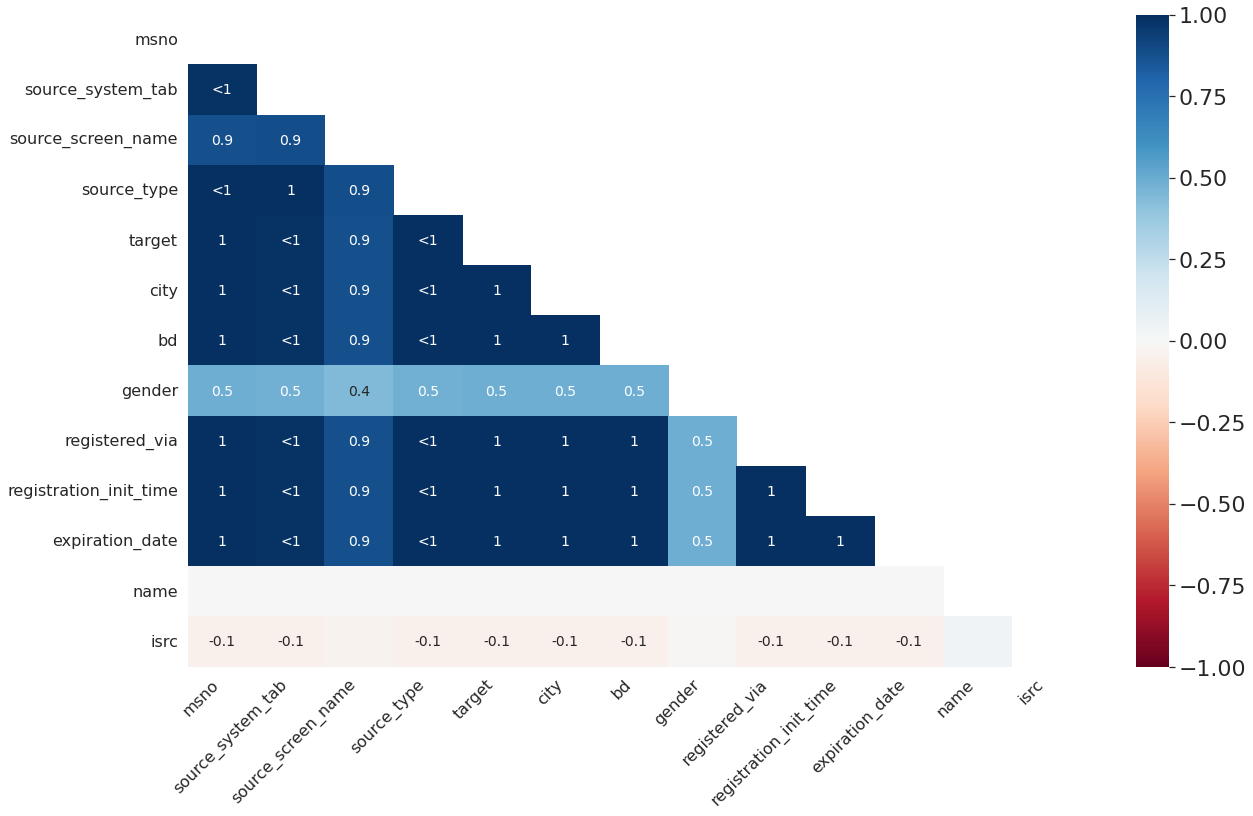

In [104]:
msno.heatmap(train_merged)

# **INFERENCES**
As we can see lot of missing values are coming up but when common thing we notice that most of the missing values are arrived from members and songs
missing values from the heatmap also showing one thing that information which are missing and has positive correlation are gender with 4 variables of train.csv and rest of varibales with members.csv

# **Function to check if missing values are present and if so print the columns having them**

In [105]:
def check_missing_values(df):
    print (df.isnull().values.any())
    if (df.isnull().values.any() == True):
        columns_with_Nan = df.columns[df.isnull().any()].tolist()
    print(columns_with_Nan)
    for col in columns_with_Nan:
        print("%s : %d" % (col, df[col].isnull().sum()))
    
check_missing_values(train_merged)
check_missing_values(test_merged)

True
['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'name', 'isrc']
msno : 1936164
source_system_tab : 1961013
source_screen_name : 2350968
source_type : 1957703
target : 1936164
city : 1936164
bd : 1936164
gender : 4897643
registered_via : 1936164
registration_init_time : 1936164
expiration_date : 1936164
name : 1458
isrc : 666227
True
['id', 'msno', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'name', 'isrc']
id : 2071333
msno : 2071333
source_system_tab : 2079775
source_screen_name : 2234216
source_type : 2078630
city : 2071333
bd : 2071333
gender : 3123557
registered_via : 2071333
registration_init_time : 2071333
expiration_date : 2071333
name : 779
isrc : 301901


# **Function to replace Nan values in columns of type float with 5**

In [106]:
def replace_Nan_non_object(df):
    object_cols = list(df.select_dtypes(include=['float']).columns)
    for col in object_cols:
        df[col]=df[col].fillna(np.int(-5))
       
replace_Nan_non_object(train_merged) 
replace_Nan_non_object(test_merged)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


# **Memory consumed by train dataframe**

In [107]:
mem = train_merged.memory_usage(index=True).sum()
print("Memory consumed by training set  :   {} MB" .format(mem/ 1024**2))

Memory consumed by training set  :   1065.8548736572266 MB


# **Memory consumed by test dataframe**

In [108]:
mem = test_merged.memory_usage(index=True).sum()
print("Memory consumed by test set      :   {} MB" .format(mem/ 1024**2))

Memory consumed by test set      :   529.6466445922852 MB


# **CHANGING DATATYPES**

In [109]:
def change_datatype(df):
    float_cols = list(df.select_dtypes(include=['float']).columns)
    for col in float_cols:
        if ((np.max(df[col]) <= 127) and(np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and(np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647) and(np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)

change_datatype(train_merged)
change_datatype(test_merged)

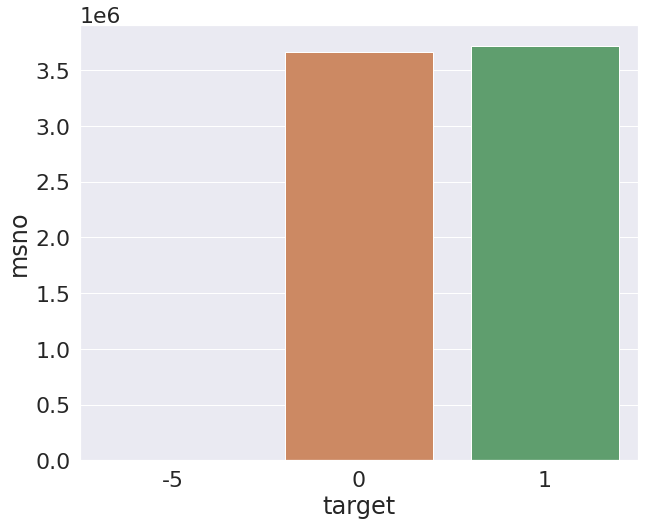

In [110]:
data = train_merged.groupby('target').aggregate({'msno':'count'}).reset_index()
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='target', y='msno', data=data)

# **INFERENCES**
1.  As we can see that new user are about 5500 and old users about 15000 , *-5 are those values which are empty

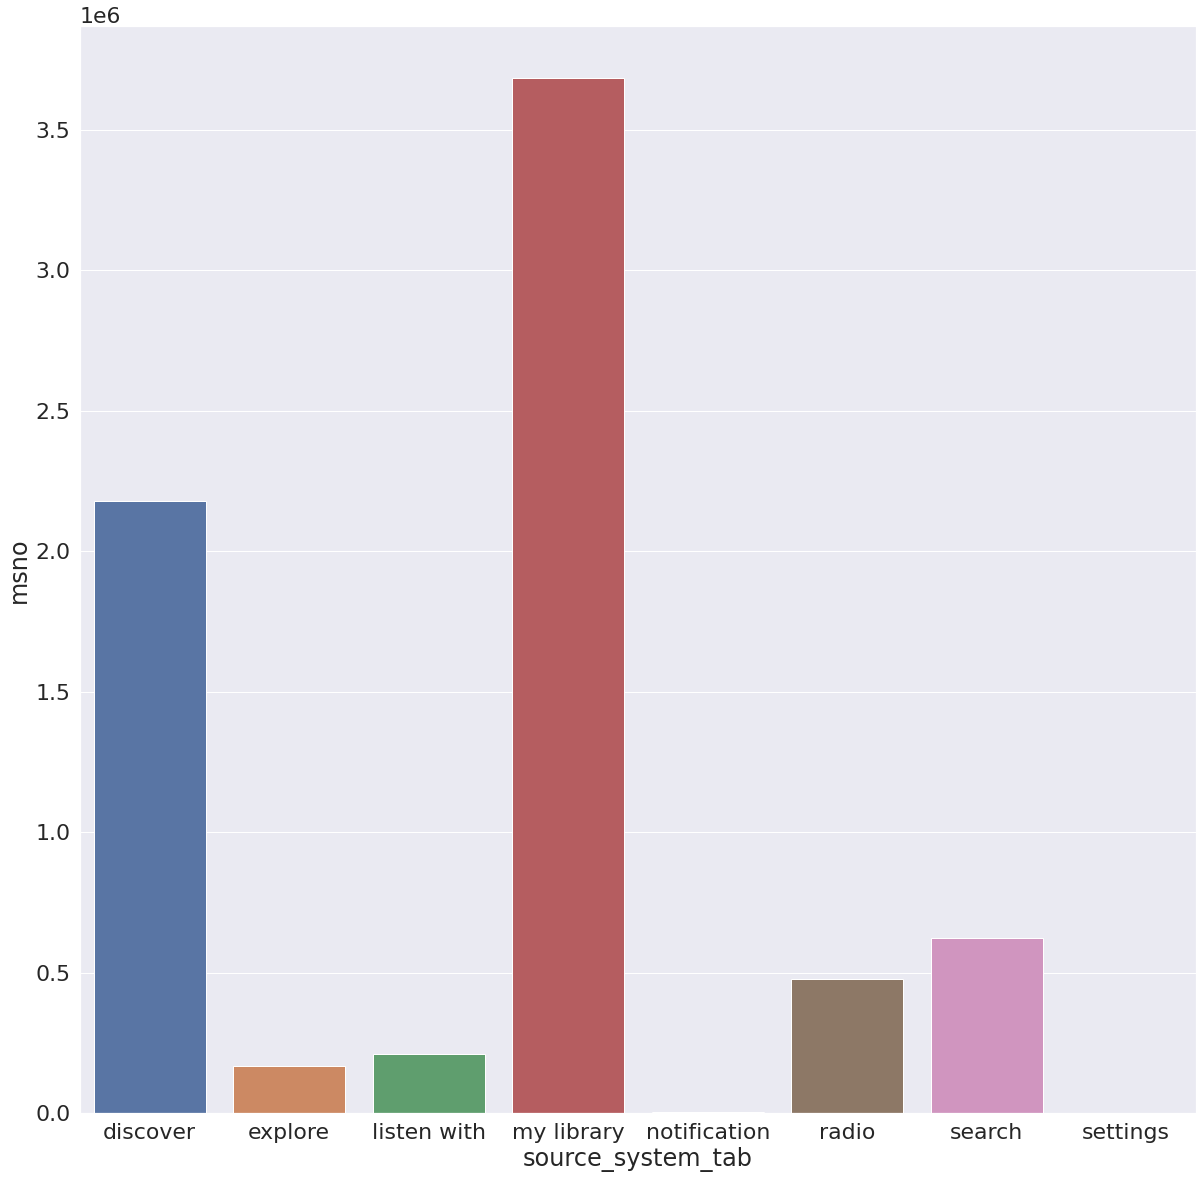

In [111]:
mpl.rcParams['font.size'] = 40.0
plt.figure(figsize = (20, 20)) 
data=train_merged.groupby('source_system_tab').aggregate({'msno':'count'}).reset_index()
sns.barplot(x='source_system_tab',y='msno',data=data)

[Text(0, 0, 'Album more'),
 Text(0, 0, 'Artist more'),
 Text(0, 0, 'Concert'),
 Text(0, 0, 'Discover Chart'),
 Text(0, 0, 'Discover Feature'),
 Text(0, 0, 'Discover Genre'),
 Text(0, 0, 'Discover New'),
 Text(0, 0, 'Explore'),
 Text(0, 0, 'Local playlist more'),
 Text(0, 0, 'My library'),
 Text(0, 0, 'My library_Search'),
 Text(0, 0, 'Online playlist more'),
 Text(0, 0, 'Others profile more'),
 Text(0, 0, 'Payment'),
 Text(0, 0, 'Radio'),
 Text(0, 0, 'Search'),
 Text(0, 0, 'Search Home'),
 Text(0, 0, 'Search Trends'),
 Text(0, 0, 'Self profile more'),
 Text(0, 0, 'Unknown')]

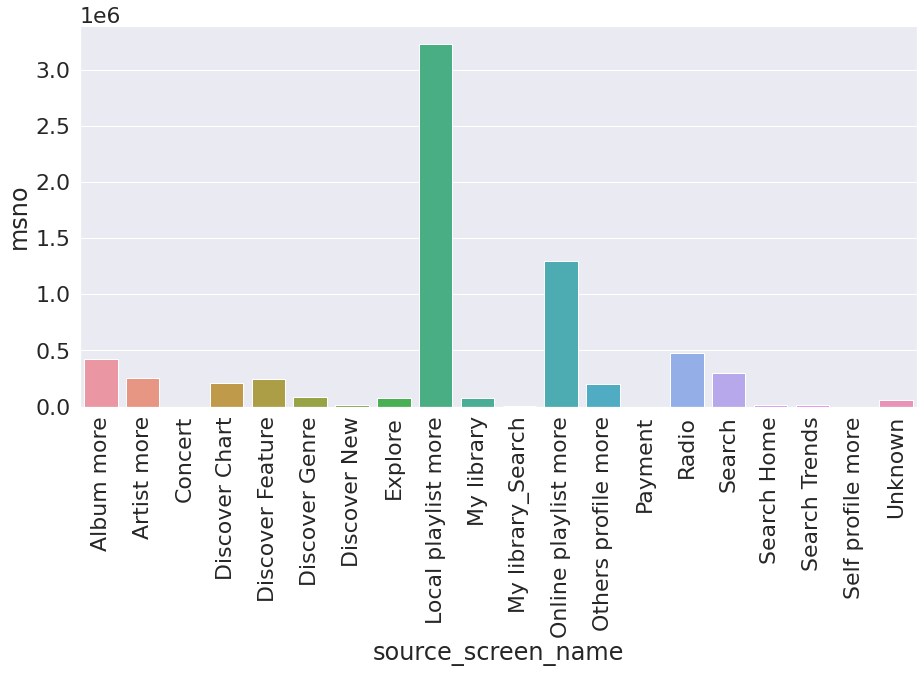

In [112]:
data = train_merged.groupby('source_screen_name').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_screen_name', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'album'),
 Text(0, 0, 'artist'),
 Text(0, 0, 'listen-with'),
 Text(0, 0, 'local-library'),
 Text(0, 0, 'local-playlist'),
 Text(0, 0, 'my-daily-playlist'),
 Text(0, 0, 'online-playlist'),
 Text(0, 0, 'radio'),
 Text(0, 0, 'song'),
 Text(0, 0, 'song-based-playlist'),
 Text(0, 0, 'top-hits-for-artist'),
 Text(0, 0, 'topic-article-playlist')]

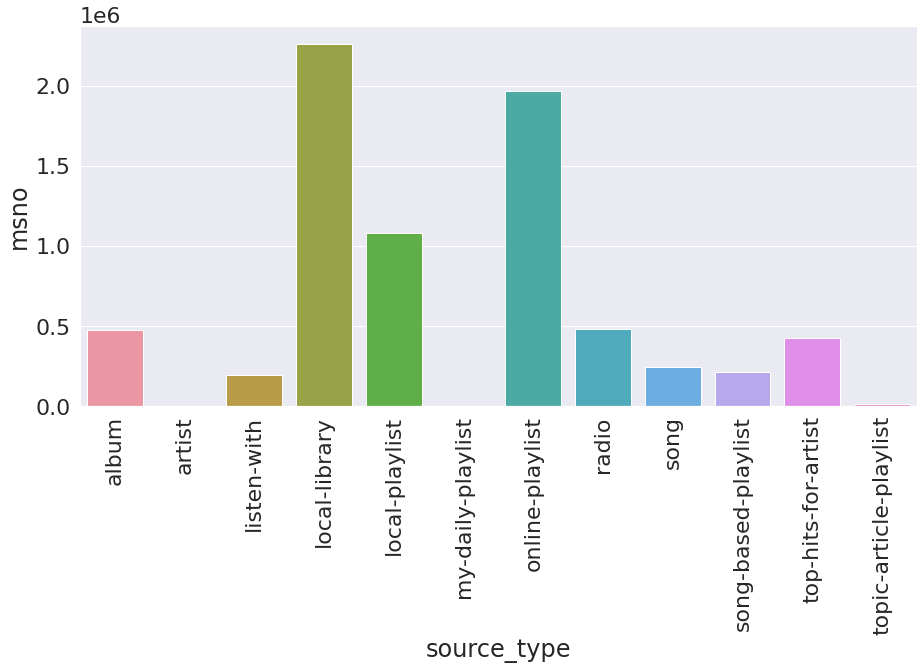

In [113]:
data = train_merged.groupby('source_type').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_type', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '-5'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '7'),
 Text(0, 0, '9'),
 Text(0, 0, '13')]

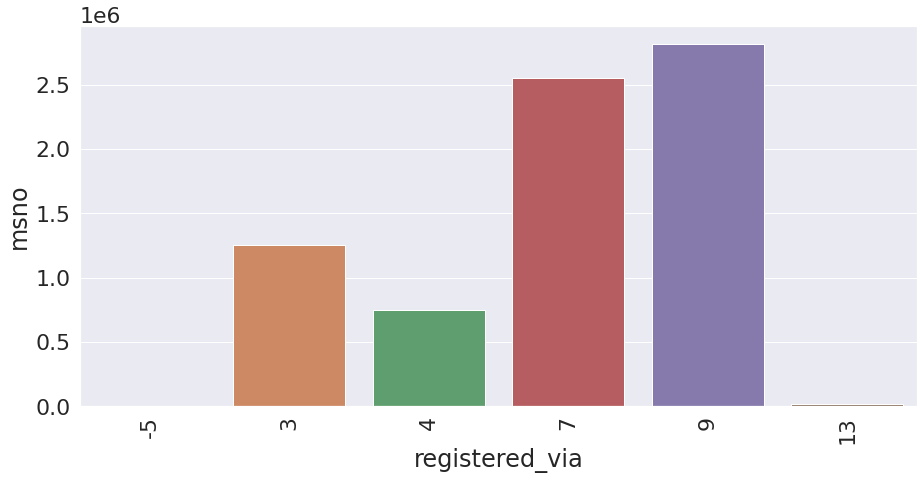

In [114]:
data = train_merged.groupby('registered_via').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='registered_via', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# **INFERENCES**
1.  Most users 7 and 9 ways have get registered

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'name', 'isrc'],
      dtype='object')


[Text(0, 0, '-5'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22')]

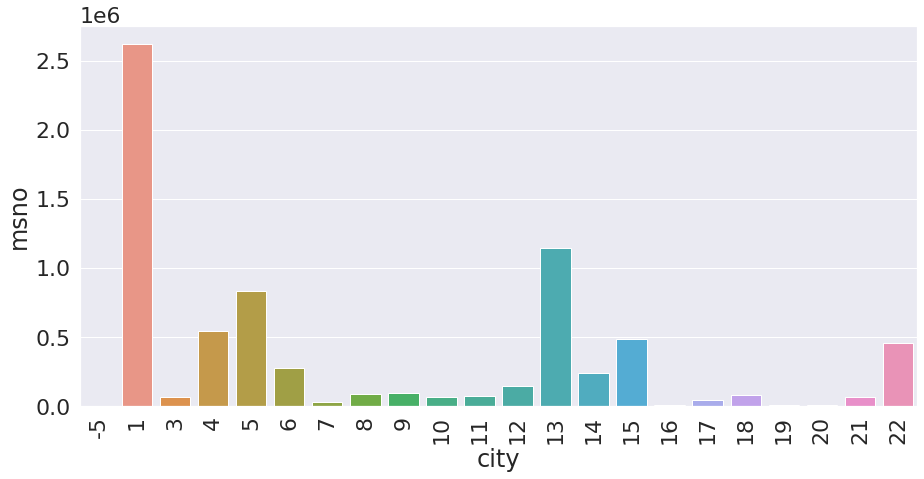

In [115]:
print(train_merged.columns)
data = train_merged.groupby('city').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='city', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# **INFERANCES**
1.  Number of users are 1,13,5 are containig maximum values

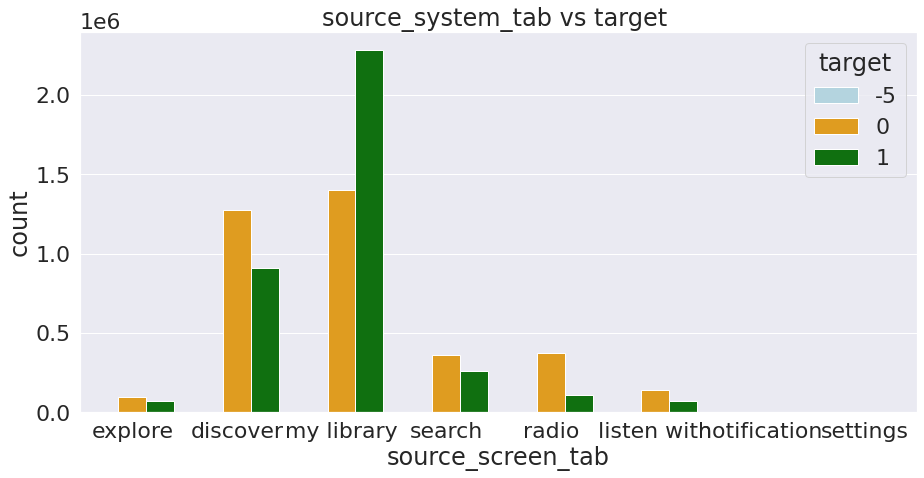

In [116]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.countplot(x="source_system_tab",data=train_merged,palette=['lightblue','orange','green'],hue="target")
plt.xlabel("source_screen_tab")
plt.ylabel("count")
plt.title("source_system_tab vs target ")
plt.show()

# **INFERENCES**
1.  New user are coming form discover and my llibrary and old ones are from my library

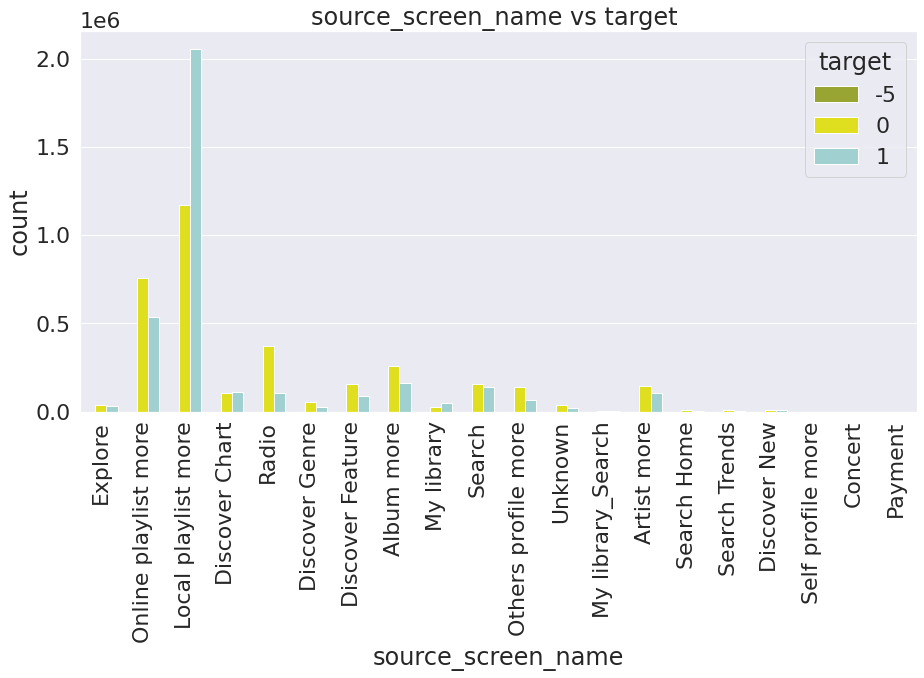

In [117]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.countplot(x="source_screen_name",data=train_merged,palette=['#A8B820','yellow','#98D8D8'],hue="target")
plt.xlabel("source_screen_name")
plt.ylabel("count")
plt.title("source_screen_name vs target ")
plt.xticks(rotation='90')
plt.show()

# **INFERENCES**
1.  Local playlist among new user and old one more most common way to get back their songs

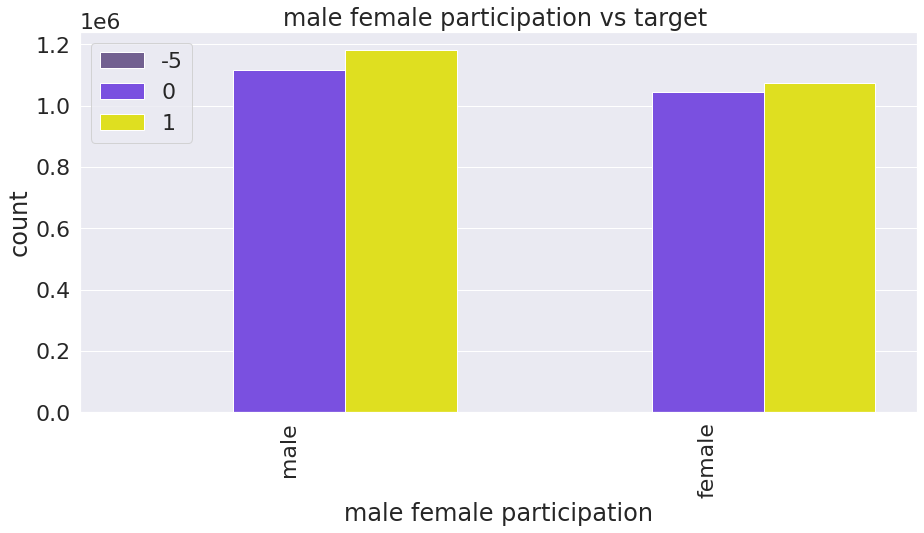

In [118]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.countplot(x="gender",data=train_merged,palette=['#705898','#7038F8','yellow'],hue="target")
plt.xlabel("male female participation")
plt.ylabel("count")
plt.title("male female participation vs target ")
plt.xticks(rotation='90')
plt.legend(loc='upper left')
plt.show()

# **INFERENCES**
1.  New female users are more than male users about 500 to 600

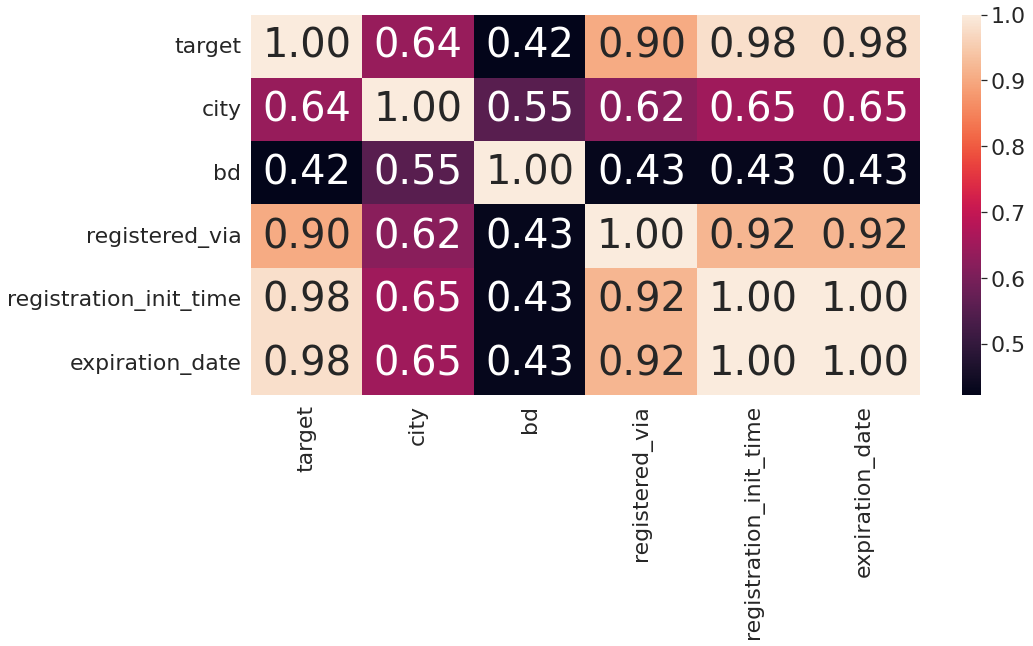

In [119]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.heatmap(data=train_merged.corr(),annot=True,fmt=".2f")

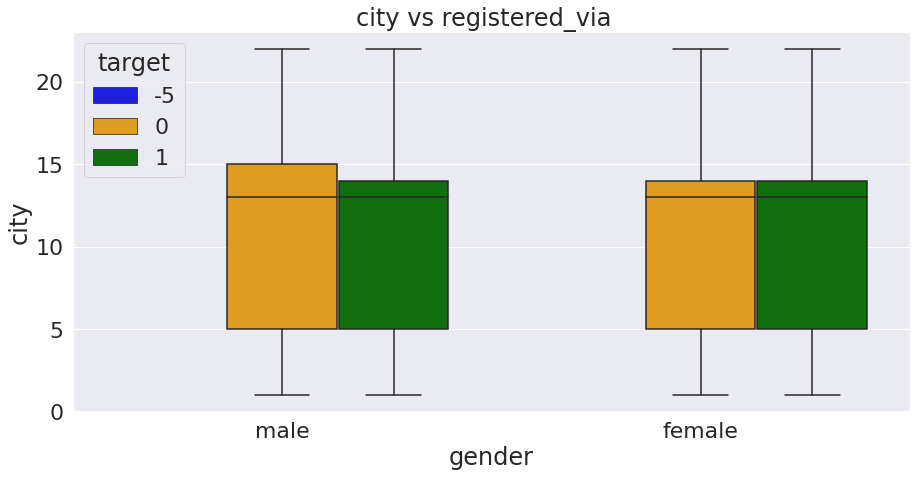

In [120]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(x="gender",y="city",data=train_merged,palette=['blue','orange','green'],hue="target")
plt.xlabel("gender")
plt.ylabel("city")
plt.title("city vs registered_via  ")
plt.show()

# **INFERENCES**
1.  Here we can see that most of our user are between 5 to 14 no of cities might be female ratio is same avg no of male users are 13 to 15 city number

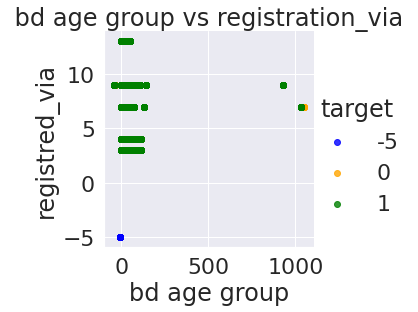

In [121]:
ax=sns.lmplot(x="bd",y="registered_via",data=train_merged,palette=['blue','orange','green'],hue="target",fit_reg=False)
plt.xlabel("bd age group")
plt.ylabel("registred_via")
plt.title(" bd age group vs registration_via ")
plt.show()

# **INFERENCES**
1.  Now we can see on thing that music users vary age form 0 to 100 we can see here are outliers to in bd but interesting information are that most users age group of younsters and 30+ age group form 5 to 10 registered_via index

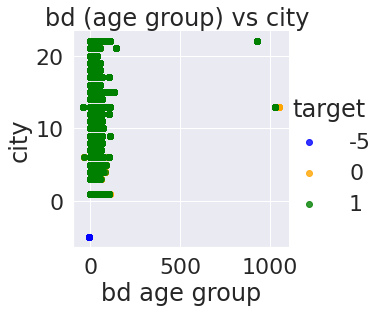

In [122]:
ax=sns.lmplot(x="bd",y="city",data=train_merged,palette=['blue','orange','green'],hue="target",fit_reg=False)
plt.xlabel("bd age group")
plt.ylabel("city")
plt.title("bd (age group) vs city ")
plt.show()

# **INFERENCES**
1.  With outlier as we can we didn't remove till now we will remove bd outliers at final stages before applying Ml but that last results insights are telling we have age group 20 to 30+ ages and city index we most 5 to 14

# **REMOVING OUTLIERS FROM BD AGE GROUP COLUMNS**

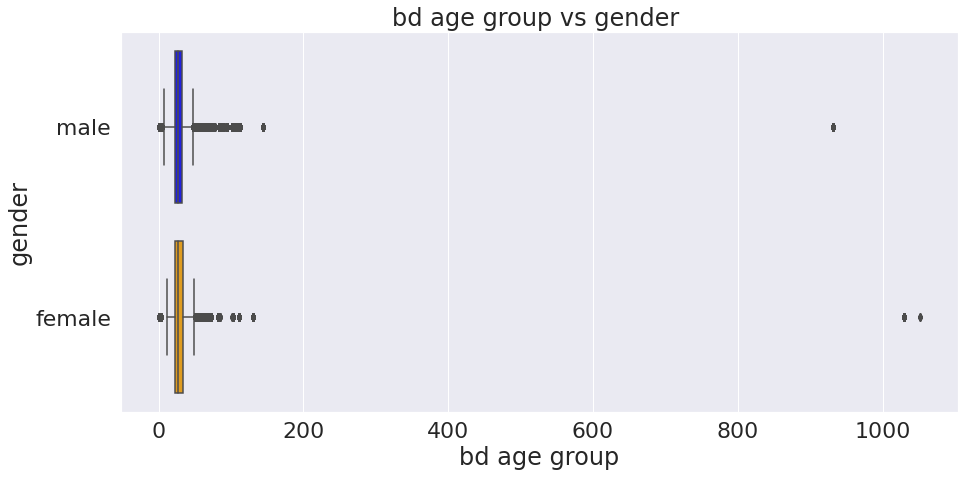

In [123]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(x="bd",y="gender",data=train_merged,palette=['blue','orange','green'])
plt.xlabel("bd age group")
plt.ylabel("gender")
plt.title("bd age group vs gender ")
plt.show()

# **INFERENCES**
1.  As we can see that mean age group we have 24 to 27 with max is 50 in female case and in male case 48 about age group is max and min in female it is about 16 and in male case 18
2.  One more observation we can see that female outlier are more there reason behind this logic females always tend fill up the things in hurry way because in male we can't see male with 100 , as if this bit funny logic.